# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 614


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather"


# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
        
    city_url =f"{url}?q={city}&appid={weather_api_key}&units=metric"


    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" %
          (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()
        

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | adamstown
Processing Record 2 of Set 1 | blackmans bay
Processing Record 3 of Set 1 | talnakh
Processing Record 4 of Set 1 | lebu
Processing Record 5 of Set 1 | saint-pierre
Processing Record 6 of Set 1 | patterson
Processing Record 7 of Set 1 | waitangi
Processing Record 8 of Set 1 | liaozhong
Processing Record 9 of Set 1 | college
Processing Record 10 of Set 1 | edinburgh of the seven seas
Processing Record 11 of Set 1 | port-aux-francais
Processing Record 12 of Set 1 | colonia
Processing Record 13 of Set 1 | laguilayan
Processing Record 14 of Set 1 | taiohae
City not found. Skipping...
Processing Record 15 of Set 1 | yulinshi
Processing Record 16 of Set 1 | tiksi
Processing Record 17 of Set 1 | haiku-pauwela
Processing Record 18 of Set 1 | suva
Processing Record 19 of Set 1 | yellowknife
Processing Record 20 of Set 1 | puerto san carlos
City not found. Skipping...
Processing Record 21 of Set 1

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          593
Lat           593
Lng           593
Max Temp      593
Humidity      593
Cloudiness    593
Wind Speed    593
Country       593
Date          593
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,adamstown,-25.0660,-130.1015,24.46,81,88,4.85,PN,1682782780
1,blackmans bay,-43.0167,147.3167,8.07,81,5,3.37,AU,1682782782
2,talnakh,69.4865,88.3972,-3.98,75,7,7.19,RU,1682782783
3,lebu,-37.6167,-73.6500,12.81,83,99,5.46,CL,1682782783
4,saint-pierre,-21.3393,55.4781,25.82,69,40,5.14,RE,1682782784


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,adamstown,-25.0660,-130.1015,24.46,81,88,4.85,PN,1682782780
1,blackmans bay,-43.0167,147.3167,8.07,81,5,3.37,AU,1682782782
2,talnakh,69.4865,88.3972,-3.98,75,7,7.19,RU,1682782783
3,lebu,-37.6167,-73.6500,12.81,83,99,5.46,CL,1682782783
4,saint-pierre,-21.3393,55.4781,25.82,69,40,5.14,RE,1682782784


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

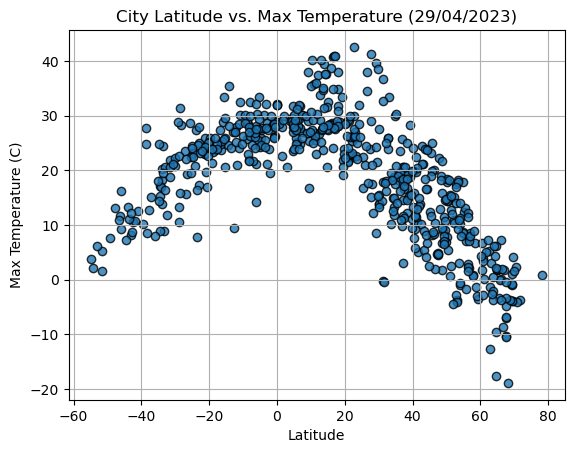

In [8]:
# Build scatter plot for latitude vs. temperature
import datetime
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], edgecolor="black", linewidths=1, marker="o", alpha=0.8, label="Cities")
date = datetime.datetime.now().strftime('%d/%m/%Y')

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Max Temperature ({date})")
plt.ylabel("Max Temperature (C)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

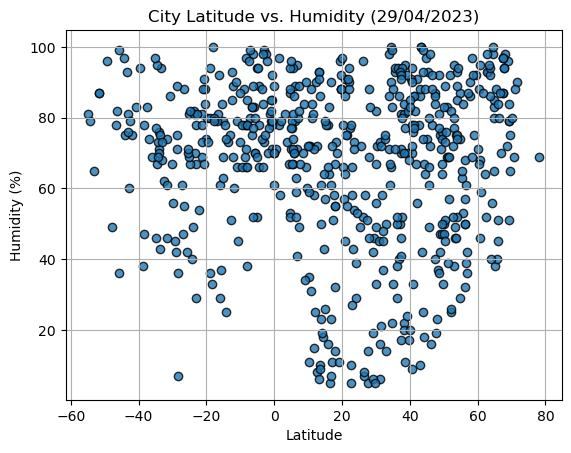

In [9]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], edgecolor="black", linewidths=1, marker="o", alpha=0.8, label="Cities")
date = datetime.datetime.now().strftime('%d/%m/%Y')

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Humidity ({date})")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

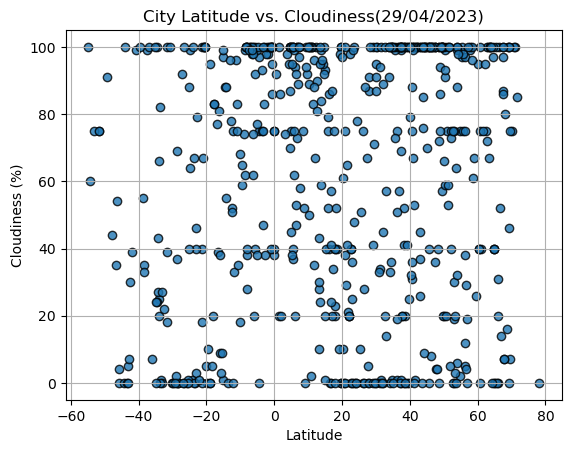

In [10]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], edgecolor="black", linewidths=1, marker="o", alpha=0.8, label="Cities")
date = datetime.datetime.now().strftime('%d/%m/%Y')
# Incorporate the other graph properties
plt.title(f"City Latitude vs. Cloudiness({date})")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

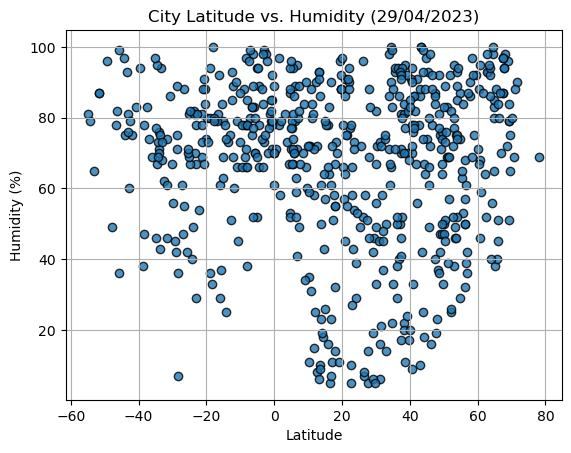

In [11]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], edgecolor="black", linewidths=1, marker="o", alpha=0.8, label="Cities")
date = datetime.datetime.now().strftime('%d/%m/%Y')
# Incorporate the other graph properties
# Incorporate the other graph properties
plt.title(f"City Latitude vs. Humidity ({date})")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

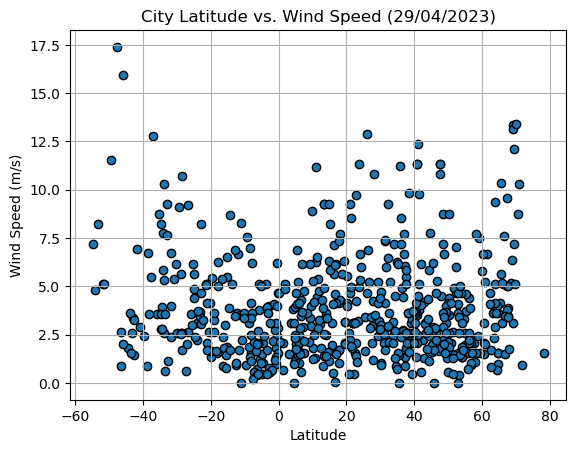

In [12]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], marker="o", edgecolors="black")
date = datetime.datetime.now().strftime('%d/%m/%Y')

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Wind Speed ({date})")
plt.ylabel("Wind Speed (m/s)")
plt.xlabel("Latitude")
plt.grid(True)


# Save the figure
plt.savefig("output_data/Fig5.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [13]:
def plot_linear_regression(x_values,y_values,title,text_coordinates):
    
    # Run regression on Southern Hemisphere
    (slope, intercept, rvalue, pvalue, stderr) = linregress (x_values,y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + " x + " + str(round(intercept,2))
    
    # Plot
    plt.scatter(x_values,y_values)
    plt.plot(x_values, regress_values, "r-")
    plt.annotate(line_eq,text_coordinates, fontsize=15, color="red")
    plt.xlabel("Latitude")
    plt.ylabel("Max Temp")
    print(f"The r-squared is: {rvalue}")
    plt.show()

In [14]:
def plot_linear_regression(x_values, y_values, x_label, y_label, hemisphere, text_coordinates):
    # Perform linear regression
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    
    # Generate regression line
    regress_values = x_values * slope + intercept
    
    # Create line equation string
    line_eq = f"y = {round(slope, 2)}x + {round(intercept, 2)}"
    
    # Create scatter plot and regression line
    plt.scatter(x_values, y_values)
    plt.plot(x_values, regress_values, "r-")
    
    # Add axis labels, title, and equation text
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(f"{hemisphere} Hemisphere: {y_label} vs. {x_label}")
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    
    # Print r-squared value
    print(f"The r-squared is: {round(rvalue ** 2, 2)}")
    
    # Show plot
    plt.show()


In [15]:
def plot_linear_regression(x_values, y_values, x_label, y_label, hemisphere, text_coordinates):
    # Calculate the slope, intercept, r-value, p-value, and standard error of the regression line
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    
    # Calculate the regression values
    regress_values = x_values * slope + intercept
    
    # Create the line equation string
    line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))
    
    # Create the scatter plot and regression line
    plt.scatter(x_values, y_values)
    plt.plot(x_values, regress_values, "r-")
    
    # Add the line equation to the plot
    plt.annotate(line_eq,(10,15),fontsize=15,color="red")
    
    # Add the labels to the plot
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    
    # Add the hemisphere name to the plot title
    plt.title(f"{hemisphere} Hemisphere: {y_label} vs. {x_label}")
    
    # Print the r-value to the console
    print(f"The r-squared is: {rvalue}")
    
    # Show the plot
    plt.show()


In [16]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,talnakh,69.4865,88.3972,-3.98,75,7,7.19,RU,1682782783
5,patterson,37.4716,-121.1297,19.46,70,99,1.81,US,1682782784
7,liaozhong,41.5061,122.7242,5.01,82,1,3.75,CN,1682782786
8,college,64.8569,-147.8028,1.78,80,40,1.54,US,1682782786
11,colonia,50.9333,6.9500,15.54,69,75,2.06,DE,1682782789


In [17]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,adamstown,-25.0660,-130.1015,24.46,81,88,4.85,PN,1682782780
1,blackmans bay,-43.0167,147.3167,8.07,81,5,3.37,AU,1682782782
3,lebu,-37.6167,-73.6500,12.81,83,99,5.46,CL,1682782783
4,saint-pierre,-21.3393,55.4781,25.82,69,40,5.14,RE,1682782784
6,waitangi,-43.9535,-176.5597,13.23,75,100,3.64,NZ,1682782785


###  Temperature vs. Latitude Linear Regression Plot

In [18]:
"""The plots highlights the complexity of weather patterns and the need for careful data analysis to uncover their underlying drivers.
The limitations of this dataset underscore the importance of incorporating historical and diverse data,
as well as other variables beyond latitude, to improve our understanding of weather dynamics and their implications."""

In [19]:
def plot_linear_regression(x_values, y_values, x_label, y_label, hemisphere, text_coordinates):
    # Calculate the slope, intercept, r-value, p-value, and standard error of the regression line
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    
    # Calculate the regression values
    regress_values = x_values * slope + intercept
    
    # Create the line equation string
    line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))
    
    # Create the scatter plot and regression line
    plt.scatter(x_values, y_values)
    plt.plot(x_values, regress_values, "r-")
    
    # Add the line equation to the plot
    plt.annotate(line_eq,(10,15),fontsize=15,color="red")
    
    # Add the labels to the plot
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    
    # Add the hemisphere name to the plot title
    plt.title(f"{hemisphere} Hemisphere: {y_label} vs. {x_label}")
    
    # Print the r-value to the console
    print(f"The r-squared is: {rvalue}")
    
    # Show the plot
    plt.show()


The r-squared is: -0.8429214196496277


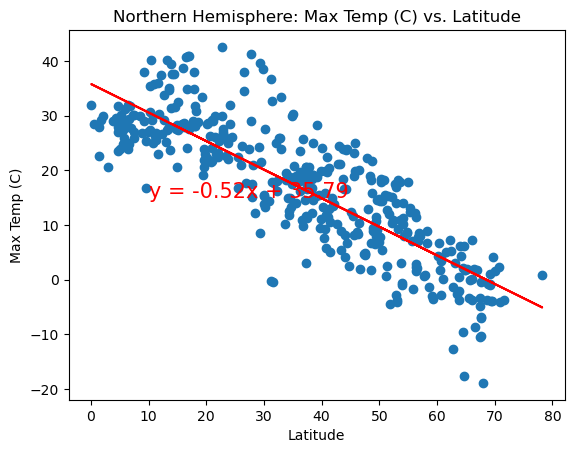

In [20]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
plot_linear_regression(x_values, y_values, "Latitude", "Max Temp (C)", "Northern", (10, 10))

#Save
plt.show()

The r-squared is: 0.7789109394016085


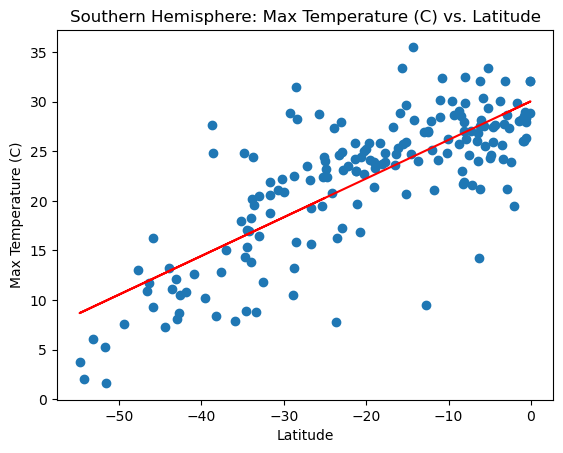

In [21]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]

# Plot
plot_linear_regression(x_values, y_values, "Latitude", "Max Temperature (C)", "Southern", (-50,80))

#Save
plt.show()

In [22]:
"""The relationship between temperature and latitude seems to follow a nonlinear pattern. 
The temperature generally increases towards the equatorThis could be explained by the Earth's axial tilt.
It's worth noting that this dataset only covers one date in time, and more historical or diverse data would 
provide a more comprehensive understanding of temperature trends"""

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

The p-value is: 0.002439138786043742
The r-value is: 0.14893524882917186


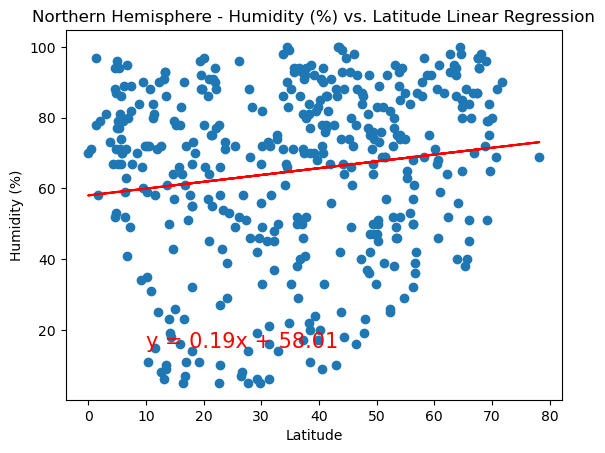

In [23]:
# Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression
x_values = pd.to_numeric(northern_hemi_df['Lat']).astype(float)
y_values = pd.to_numeric(northern_hemi_df['Humidity']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot 3: Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(10,15),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression')

# Calculated pvalue to determine whether correlation is significant(if there is truly a relationship):
print(f"The p-value is: {pvalue}")
print(f"The r-value is: {rvalue}")

#Save 
plt.show()

The p-value is: 0.07967512428176104
The r-value is: 0.13061408275263


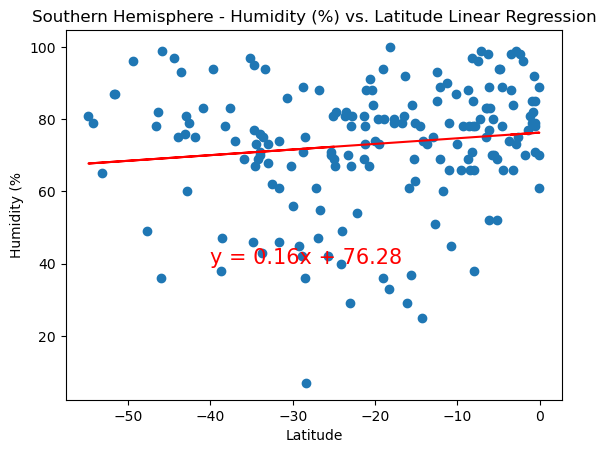

In [24]:
# Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression
x_values = pd.to_numeric(southern_hemi_df['Lat']).astype(float)
y_values = pd.to_numeric(southern_hemi_df['Humidity']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot 4: Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-40,40),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%')
plt.title('Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression')

# Calculated pvalue to determine whether correlation is significant(if there is truly a relationship):
print(f"The p-value is: {pvalue}")
print(f"The r-value is: {rvalue}")

#Save
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

In [25]:
"""The analysis indicates that both plots exhibit an inverse relationship between humidity and distance from the equator.
Despite this similarity, the correlation between latitude and humidity appears to be weak for both hemispheres.
This suggests that latitude may not be a strong predictor of humidity
"""

### Cloudiness vs. Latitude Linear Regression Plot

The p-value is: 0.6437853432635424
The r-value is: -0.022847884899593295


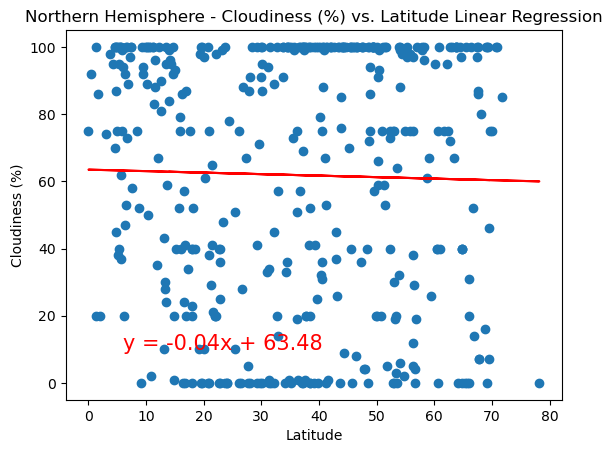

In [26]:
# Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression
x_values = pd.to_numeric(northern_hemi_df['Lat']).astype(float)
y_values = pd.to_numeric(northern_hemi_df['Cloudiness']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression')

# Calculated pvalue
print(f"The p-value is: {pvalue}")
print(f"The r-value is: {rvalue}")

#Save
plt.show()


The p-value is: 3.6288234851349665e-06
The r-value is: 0.3365009837590108


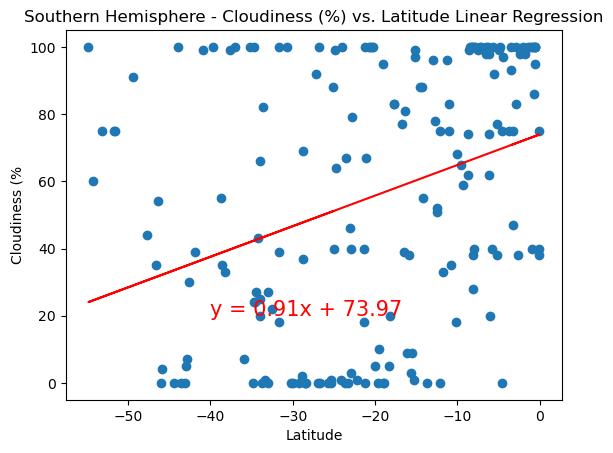

In [27]:
# Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression:
x_values = pd.to_numeric(southern_hemi_df['Lat']).astype(float)
y_values = pd.to_numeric(southern_hemi_df['Cloudiness']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-40,20),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%')
plt.title('Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression')

# Calculated pvalue 
print(f"The p-value is: {pvalue}")
print(f"The r-value is: {rvalue}")

#Save
plt.show()

In [28]:
"""The analysis shows that in the southern hemisphere, there is a weak positive correlation between cloudiness and latitude.
The linear regression model suggests that cloudiness increases slightly as latitude increases in the southern hemisphere.
However, in the northern hemisphere, there appears to be no significant correlation between cloudiness and latitude.
However, the conclusion should be taken with caution since the data covers a limited time span. Further analyses over an 
extended period could uncover hidden relationships or seasonal effects.
"""

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

The p-value is: 0.11398344321294614
The r-value is: 0.07798588628886531


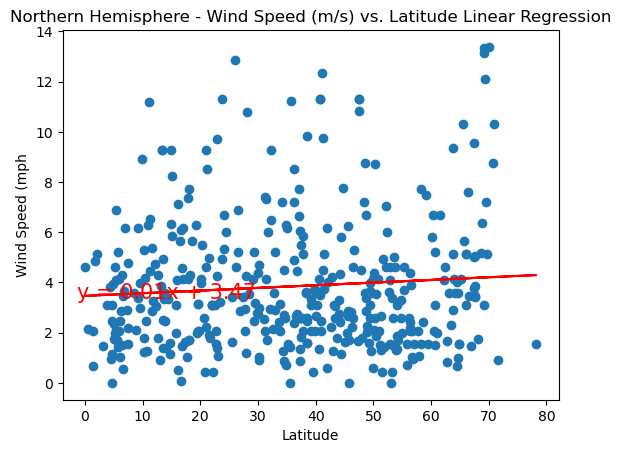

In [29]:
# Northern Hemisphere - Wind Speed (m/s) vs. Latitude Linear Regression:
x_values = pd.to_numeric(northern_hemi_df['Lat']).astype(float)
y_values = pd.to_numeric(northern_hemi_df['Wind Speed']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot 
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq, (0, 60), xycoords='axes points', xytext=(10, 10), fontsize=15, color="red",
             textcoords='offset points', ha='left', va='bottom')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph')
plt.title('Northern Hemisphere - Wind Speed (m/s) vs. Latitude Linear Regression')

# Calculated pvalue 
print(f"The p-value is: {pvalue}")
print(f"The r-value is: {rvalue}")

#Save
plt.show()


The p-value is: 7.214912783547917e-08
The r-value is: -0.38726944465924257


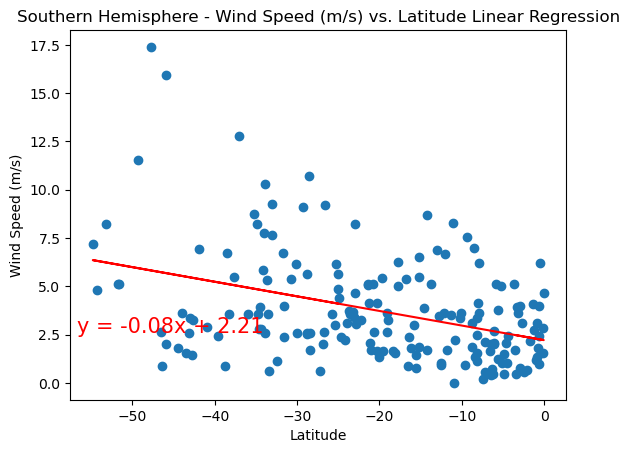

In [30]:
# Southern Hemisphere - Wind Speed (m/s) vs. Latitude Linear Regression: 
x_values = pd.to_numeric(southern_hemi_df['Lat']).astype(float)
y_values = pd.to_numeric(southern_hemi_df['Wind Speed']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#Plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq, (-5, 35), xycoords='axes points', xytext=(10, 10), fontsize=15, color="red",
             textcoords='offset points', ha='left', va='bottom')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')
plt.title('Southern Hemisphere - Wind Speed (m/s) vs. Latitude Linear Regression')

# Calculated pvalue :
print(f"The p-value is: {pvalue}")
print(f"The r-value is: {rvalue}")

#Save
plt.show()


**Discussion about the linear relationship:** YOUR RESPONSE HERE

In [31]:
"""The analysis suggests that there is a weak correlation between wind speed and latitude in both hemispheres. 
However, in the Southern Hemisphere, the relationship appears to be slightly stronger and more significant.
The weak correlation suggests that other factors, besides latitude alone, influence wind speed. 
Combining latitude and longitude data could reveal more detailed patterns in weather variables and their associations, 
providing a more comprehensive understanding of the relationship between wind speed and geographical location
"""